## Final Project Submission

Please fill out:
* Student name: Allie Kelly
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Victor
* Blog post URL:


 ## First Step: Import all necessary packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')
print(df.describe())
print(df.info())
df.head()

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825    

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


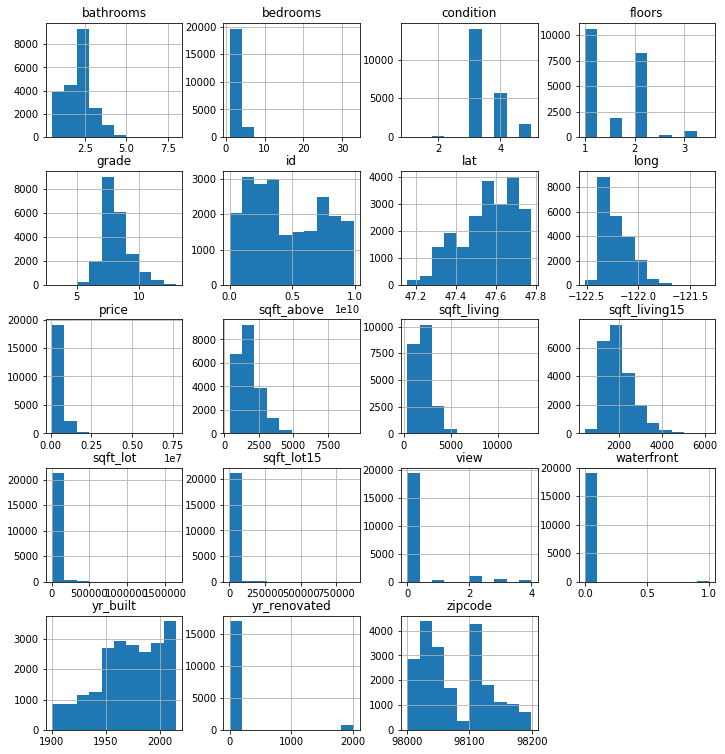

In [3]:
df.hist(figsize=(12,13));

## Preliminary Investigation
### Data Types

A few things stuck out to me first, namely that the bedroom max value is 33, which is almost an unbelieveable number and may have been intended to be just 3. When I clean the data, I may substitute for the mean/mode value to mitigate any disruption due to such an extreme outlier. 

I also noticed that the basement square-footage values are strings instead of floats, which will need to be changed. 

Year renovated, View, and Waterfront all have null values in them which will need to be investigated. 

Also, the zipcode series is an integer, but should be a string as zipcodes are immutable and should not be dealt with as a number, barring any rezoning which isn't a concern for this process. Changing the datatype may not be necessary for this project though. 

All categorical series are integers/floats, which will need to be changed to strings and one-hot encoded.

### Histograms

You can see most of the variables are categorical variables such as waterfront, view, year renovated, floors, condition, bathrooms and bedrooms. Grade looks continuous, though it's an integer so it's unlikely. Variables that indicate square footage seem to follow a normalized pattern. 

## Second Step: Scrub the Data


### Dealing with NaNs

In [4]:
df.waterfront.value_counts(dropna=False)

0.0    19075
NaN     2376
1.0      146
Name: waterfront, dtype: int64

In [5]:
df.waterfront.fillna(0.0, inplace=True) #Less than 1% of the properties were on the water, so I replaced the NaNs with 0.0.

In [6]:
df.waterfront.value_counts(dropna=False)

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [7]:
df.yr_renovated.value_counts(dropna=False) #It looks as if 0 indicates that it's never been renovated.

0.0       17011
NaN        3842
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2005.0       29
2000.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2001.0       15
2008.0       15
2010.0       15
1983.0       15
2015.0       14
1986.0       14
1987.0       14
1994.0       14
1985.0       14
1992.0       13
1995.0       12
1997.0       12
          ...  
1964.0        5
1975.0        5
1973.0        4
1981.0        4
1963.0        4
1969.0        4
1965.0        4
1972.0        3
1956.0        3
1945.0        3
1960.0        3
1978.0        3
1958.0        3
1955.0        3
1974.0        2
1962.0        2
1967.0        2
1940.0        2
1957.0        2
1946.0        1
1959.0        1
1951.0        1
1954.0        1
1950.0        1
1971.0        1
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Leng

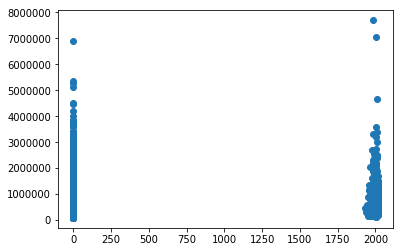

In [8]:
plt.scatter(df.yr_renovated, df.price)

In [9]:
yes_ren = df.loc[df.yr_renovated > 0.0]


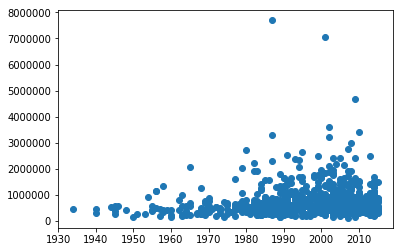

In [10]:
plt.scatter(yes_ren.yr_renovated, yes_ren.price) #It looks like there is a general trend towards higher priced homes having been more recently renovated, the vast majority of all the homes are still 200000 or less, so I'm going to drop this column. 

In [11]:
df = df.drop("yr_renovated", axis=1)

In [12]:
df.view.value_counts(dropna=False) 

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
NaN       63
Name: view, dtype: int64

In [13]:
df.view.fillna(0.0, inplace=True)
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

### Multicollinearity Check

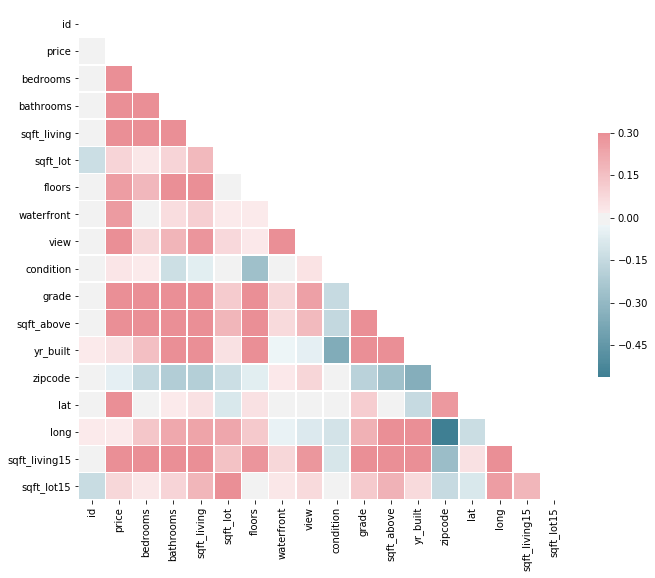

In [14]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [15]:
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [16]:
target = df.iloc[:,2]

In [17]:
pd.DataFrame(target)
target.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [18]:
features = df.drop(['price','id'], axis=1)

In [19]:
features.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,12/9/2014,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,2/25/2015,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,12/9/2014,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,2/18/2015,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [20]:
features.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.155670,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.507173,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.318152,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.052946,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,0.489193,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,-0.024487,0.028923,-0.012157,-0.037628,0.083823,0.030658
view,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,-0.054452,0.085059,0.006321,-0.077702,0.278928,0.073083
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,-0.361592,0.002888,-0.015102,-0.105877,-0.093072,-0.003126
grade,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,0.249082,-0.146896,1.000000,0.756073,0.447865,-0.185771,0.113575,0.200341,0.713867,0.120981
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,0.071778,0.166017,-0.158904,0.756073,1.000000,0.424037,-0.261570,-0.001199,0.344842,0.731767,0.195077


In [21]:
abs(features.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,False,True,True,False,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False


In [22]:
features = features.drop('sqft_above', axis=1) #Too highly correlated with sqft_living

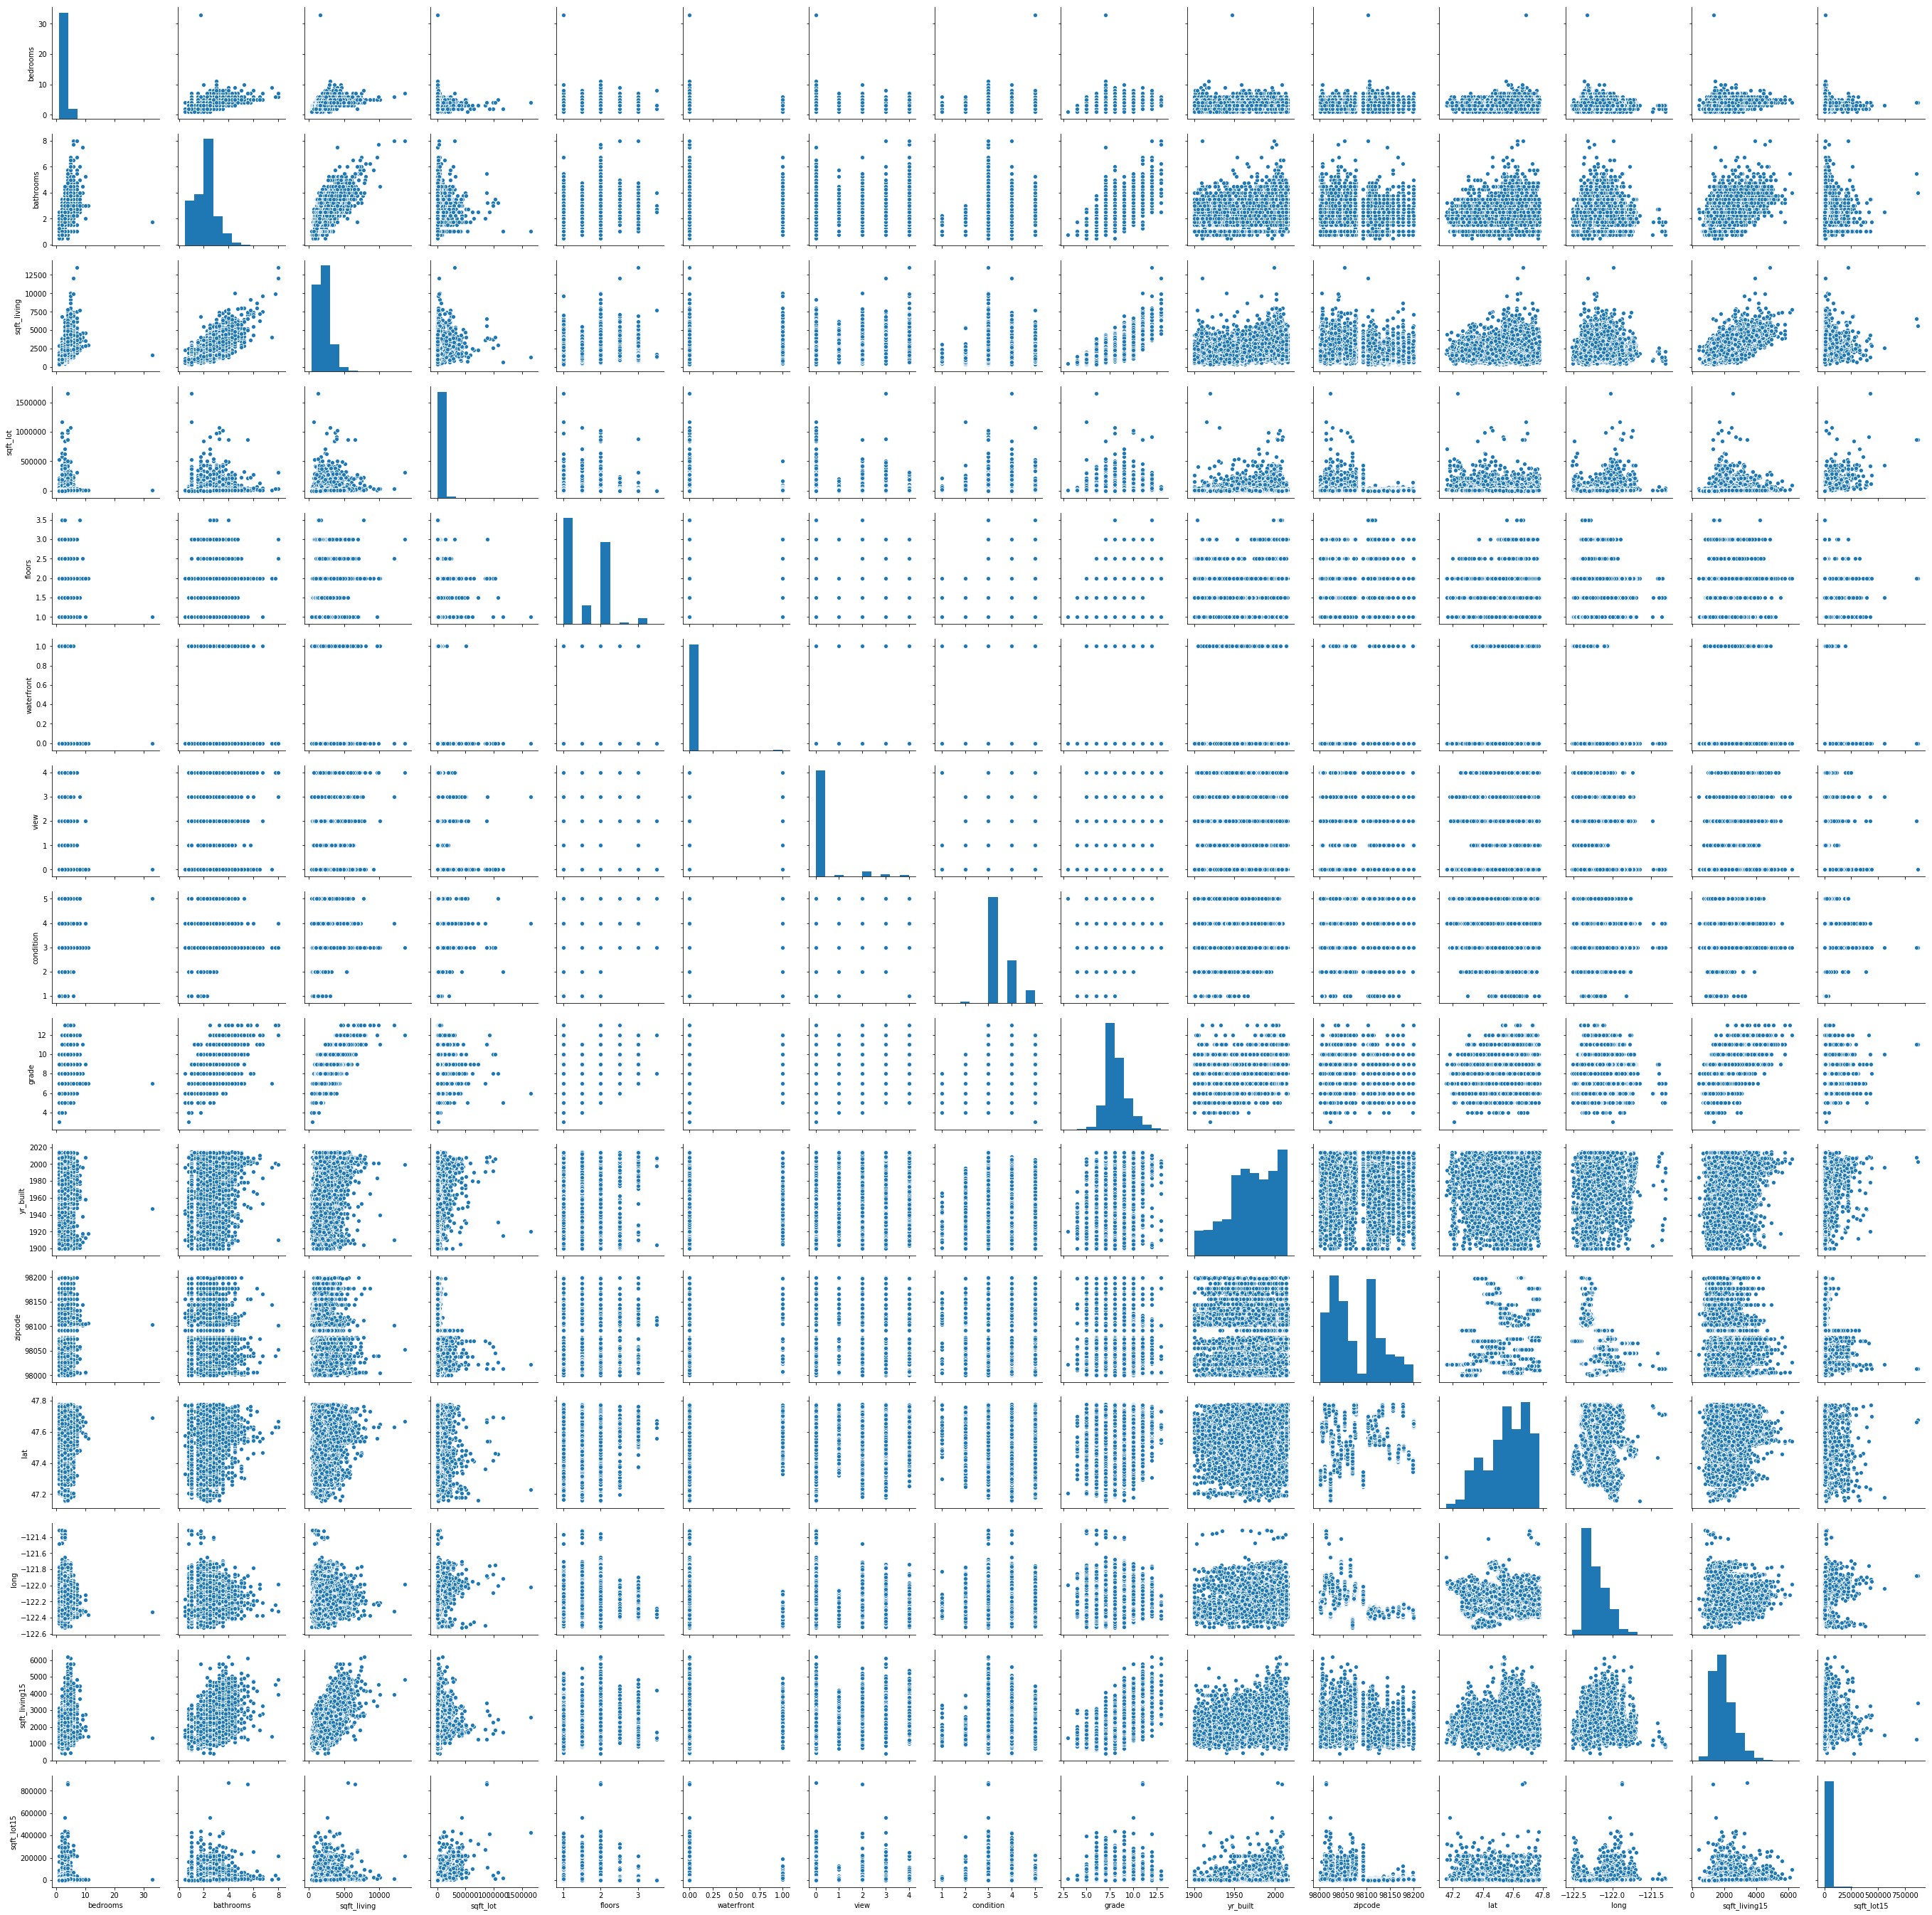

In [23]:
sns.pairplot(features); #too bad I can't read this

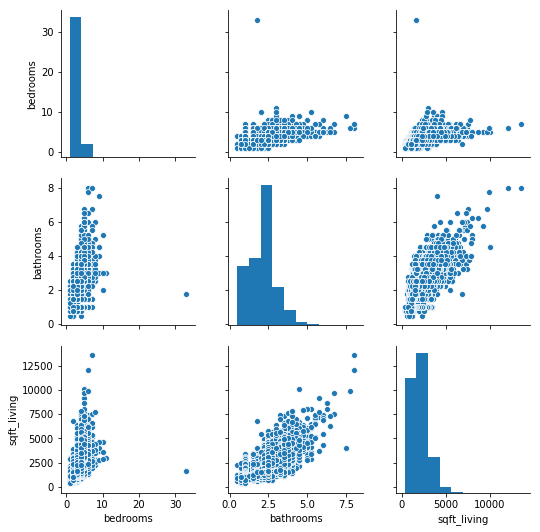

In [24]:
sns.pairplot(features.iloc[:, range(0,4)])

### Normalize Non-Categorical Features


In [25]:
features.sqft_living = (features.sqft_living - features.sqft_living.mean()) / features.sqft_living.std()
features.sqft_living15 = (features.sqft_living15 - features.sqft_living15.mean()) / features.sqft_living15.std()
features.sqft_lot = (features.sqft_lot - features.sqft_lot.mean()) / features.sqft_lot.std()
features.sqft_lot15 = (features.sqft_lot15 - features.sqft_lot15.mean()) / features.sqft_lot15.std()

### Binning Categories

### One-Hot Encode Categorical Features

In [27]:
features.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,3,1.00,-0.980629,-0.228177,1.0,0.0,0.0,3,7,0.0,1955,98178,47.5112,-122.257,-0.943654,-0.260621
1,12/9/2014,3,2.25,0.533357,-0.189735,2.0,0.0,0.0,3,7,400.0,1951,98125,47.7210,-122.319,-0.432877,-0.187695
2,2/25/2015,2,1.00,-1.427201,-0.123137,1.0,0.0,0.0,3,6,0.0,1933,98028,47.7379,-122.233,1.070267,-0.172186
3,12/9/2014,4,3.00,-0.131054,-0.243873,1.0,0.0,0.0,5,7,910.0,1965,98136,47.5208,-122.393,-0.914467,-0.284453
4,2/18/2015,3,2.00,-0.436030,-0.169499,1.0,0.0,0.0,3,8,0.0,1987,98074,47.6168,-122.045,-0.272347,-0.192682


In [32]:
features = features.drop(['date', 'lat', 'long'], axis=1) #Dropping date sold may give us information about market fluctuations but can't predict future market fluctuations (should be a study on it's own), and lat and long because zip code as an indicator of area has more to do with housing prices because of school districts, etc, than it's precise location on a map. Possibility to redo this study in the future to add lat and long back in and see what happens. 


In [31]:
features = features.drop('view', axis=1) #Dropping view because it indicated whether the house has been viewed by prospective buyers. It may be interesting to know how many times it's been viewed before it's been sold, but that's not the purpose of this study. 

In [33]:
features.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'zipcode', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [38]:
features.bedrooms = features.bedrooms.astype('str')
features.bathrooms = features.bathrooms.astype('str')
features.floors = features.floors.astype('str')
features.waterfront = features.waterfront.astype('str')
features.condition = features.condition.astype('str')
features.grade = features.grade.astype('str')

In [39]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
bedrooms         21597 non-null object
bathrooms        21597 non-null object
sqft_living      21597 non-null float64
sqft_lot         21597 non-null float64
floors           21597 non-null object
waterfront       21597 non-null object
condition        21597 non-null object
grade            21597 non-null object
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
zipcode          21597 non-null int64
sqft_living15    21597 non-null float64
sqft_lot15       21597 non-null float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.1+ MB


In [41]:
from sklearn.preprocessing import LabelEncoder #Forgot changing the datatype to a string wasn't necessary with this!
lb_make = LabelEncoder()

cat_features = features.loc[:, ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade']]
